### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#reading the csv file
df = pd.read_csv('bankloan.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no null values in the dataset. Of the 14 columns, all the columns except 'CCAvg' have integer datatype. The column 'CCAvg' has float data type.

Further we can check for the presence of null values using the isnull() method

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

The column 'ID' and 'ZIP.Code' are irrelevant, so we drop it.

In [6]:
df = df.drop(['ID','ZIP.Code'],axis = 1)

In [7]:
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


We can see that in the 'Experience' column some datas are absurd. Experience of a person is recorded in years so, it cannot be negative. 

In [8]:
#using abs() method to convert negative values to positive values in the 'Experience' column
df['Experience'] = abs(df['Experience'])

In [9]:
#rechecking if there are any negative values present
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard


### Summary Statistics

We summarise only the descriptive statistical measures of the 5 features namely,'Age','Experience','Income','CCAvg' and 'Mortgage' because all the other features have categorical data. 

In [10]:
df[['Age','Experience','Income','CCAvg','Mortgage']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


According to the results,
- The mean age of a customer is 45.338400 years with a standard deviation of 11.463166. The median age is 45 years. The age range is 23-67.
- A customer is considered to have 20.1346 years of experience on an average, with a standard deviation of 11.415189. 
- The average annual income of a customer is 73,774.200 dollars. The income is ranging from 8,000 dollars to 224,000 dollars.
- The mean Credit Card Average Score of a customer is 1.937938 with a standard deviation of 1.747659. The median Credit Card Average Score is 1.5.
- The customer is considered to have taken a mortgage of 56498.800 dollaars on an average. The highest mortgage value taken by a customer is 635000 dollars.

In [11]:
#checking for the column names
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account',
       'Online', 'CreditCard'],
      dtype='object')

Checking for any duplicated data.

In [12]:
df.duplicated().sum()

13

We find 13 duplicate datas so we drop them.

In [13]:
df.drop_duplicates()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


We can see that there are no duplicates datas. Now we proceed with the Exploratory Data Analysis.

## Exploratory Data Analysis

According to the dataset, the bank loan for 480 customers have been approved while that of 4520 customers have been denied. We visualize the data using a count plot as shown below.

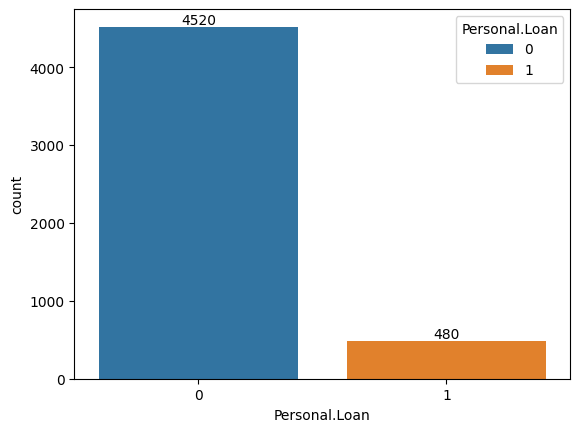

In [14]:
ax= sns.countplot(data = df, x = 'Personal.Loan', hue='Personal.Loan')
for i in ax.containers:
    ax.bar_label(i,)

After the EDA is done, we will built models considering this feature(Personal.Loan) as the target variable. But we notice that the dataset is highly imbalanced. So later on, while model building we will take appropriate measures in order to make the data balanced. For now, we carry out with the rest of the EDA.

We do the same with the the features- Family, Education, Online, Securities.Account, CD.Account, CreditCard.

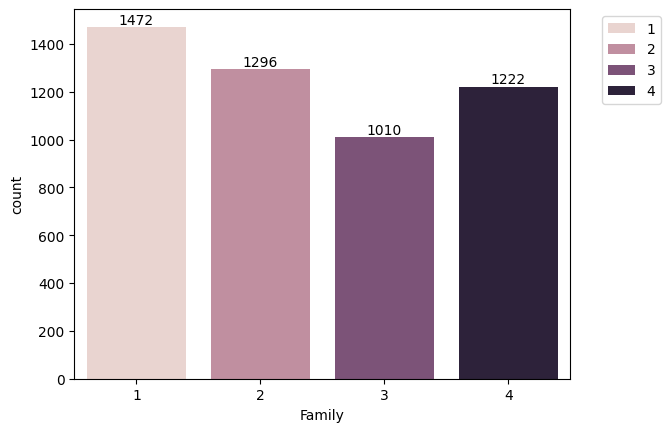

In [15]:
ax=sns.countplot(data=df,x="Family", hue='Family')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Of the 5000 customers, 1472 customers have only 1 member in their family, 1296 customers have 2 members in their family, 1010 customers have 3 members in their family and 1222 customers have 4 members in their family.

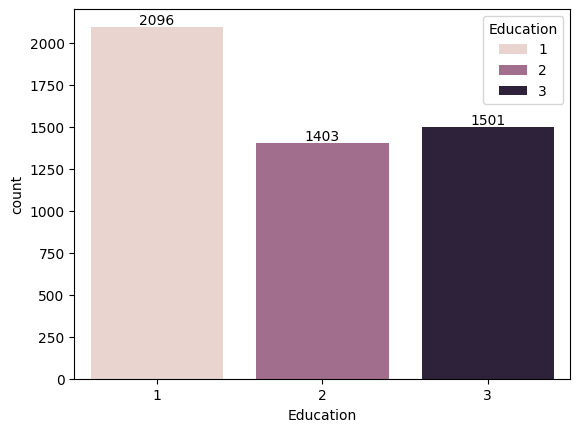

In [16]:
ax=sns.countplot(data = df, x ='Education', hue='Education')
for i in ax.containers:
    ax.bar_label(i,)

As it is given, '1' corresponds to Bachelor's degree, '2' corresponds to Master's degree and '3' to Adanced degree, so of the 5000 customers, the highest education qualification achieved by 2096 customers is Bachelor's degree, 1403 customers have done master's degree, while 1501 customers have done advanced degree.

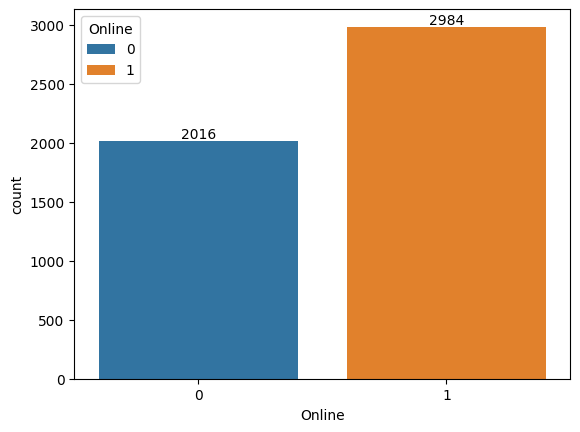

In [17]:
ax=sns.countplot(data=df,x='Online',hue='Online')
for i in ax.containers:
    ax.bar_label(i,)

The above countplot shows that 2984 customers have online banking while 2016 do not have online banking.

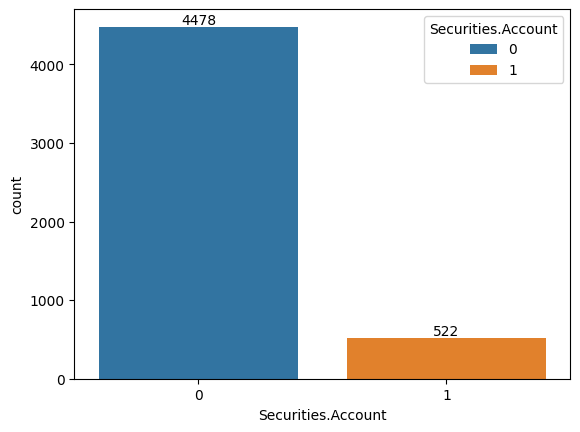

In [18]:
ax = sns.countplot(data=df,x='Securities.Account',hue='Securities.Account')
for i in ax.containers:
    ax.bar_label(i,)

The data shows that 4478 customers do not have a Securities Account while 522 customers have a Securities Account.

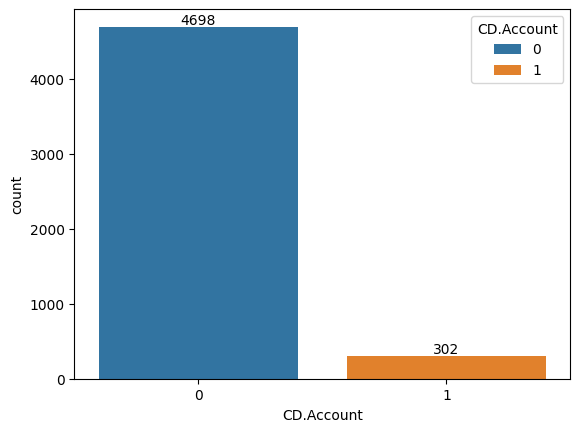

In [19]:
ax = sns.countplot(data=df,x='CD.Account',hue='CD.Account')
for i in ax.containers:
    ax.bar_label(i,)

Of the 5000 entries, 4698 customers do not have a CD Account, while 302 have a CD Account.

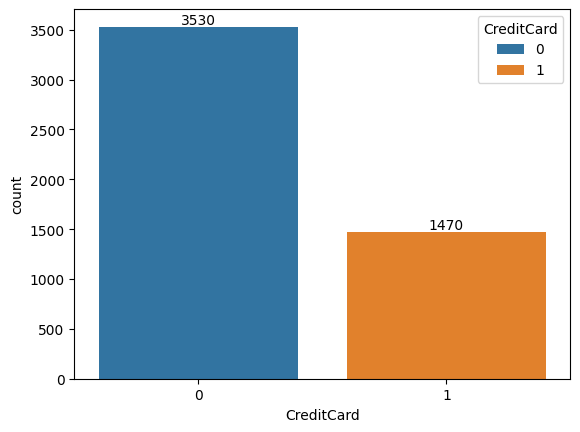

In [20]:
ax = sns.countplot(data=df,x='CreditCard',hue='CreditCard')
for i in ax.containers:
    ax.bar_label(i,)

Of the 5000 entries, 3530 customers do not have a Credit Card, while 1470 have a Credit Card.

### Outliers Detection

Now we plot the histograms of the columns Age, Experience, Mortgage, CCAvg, Income to see and compare their distributions.

<Axes: xlabel='Income', ylabel='Count'>

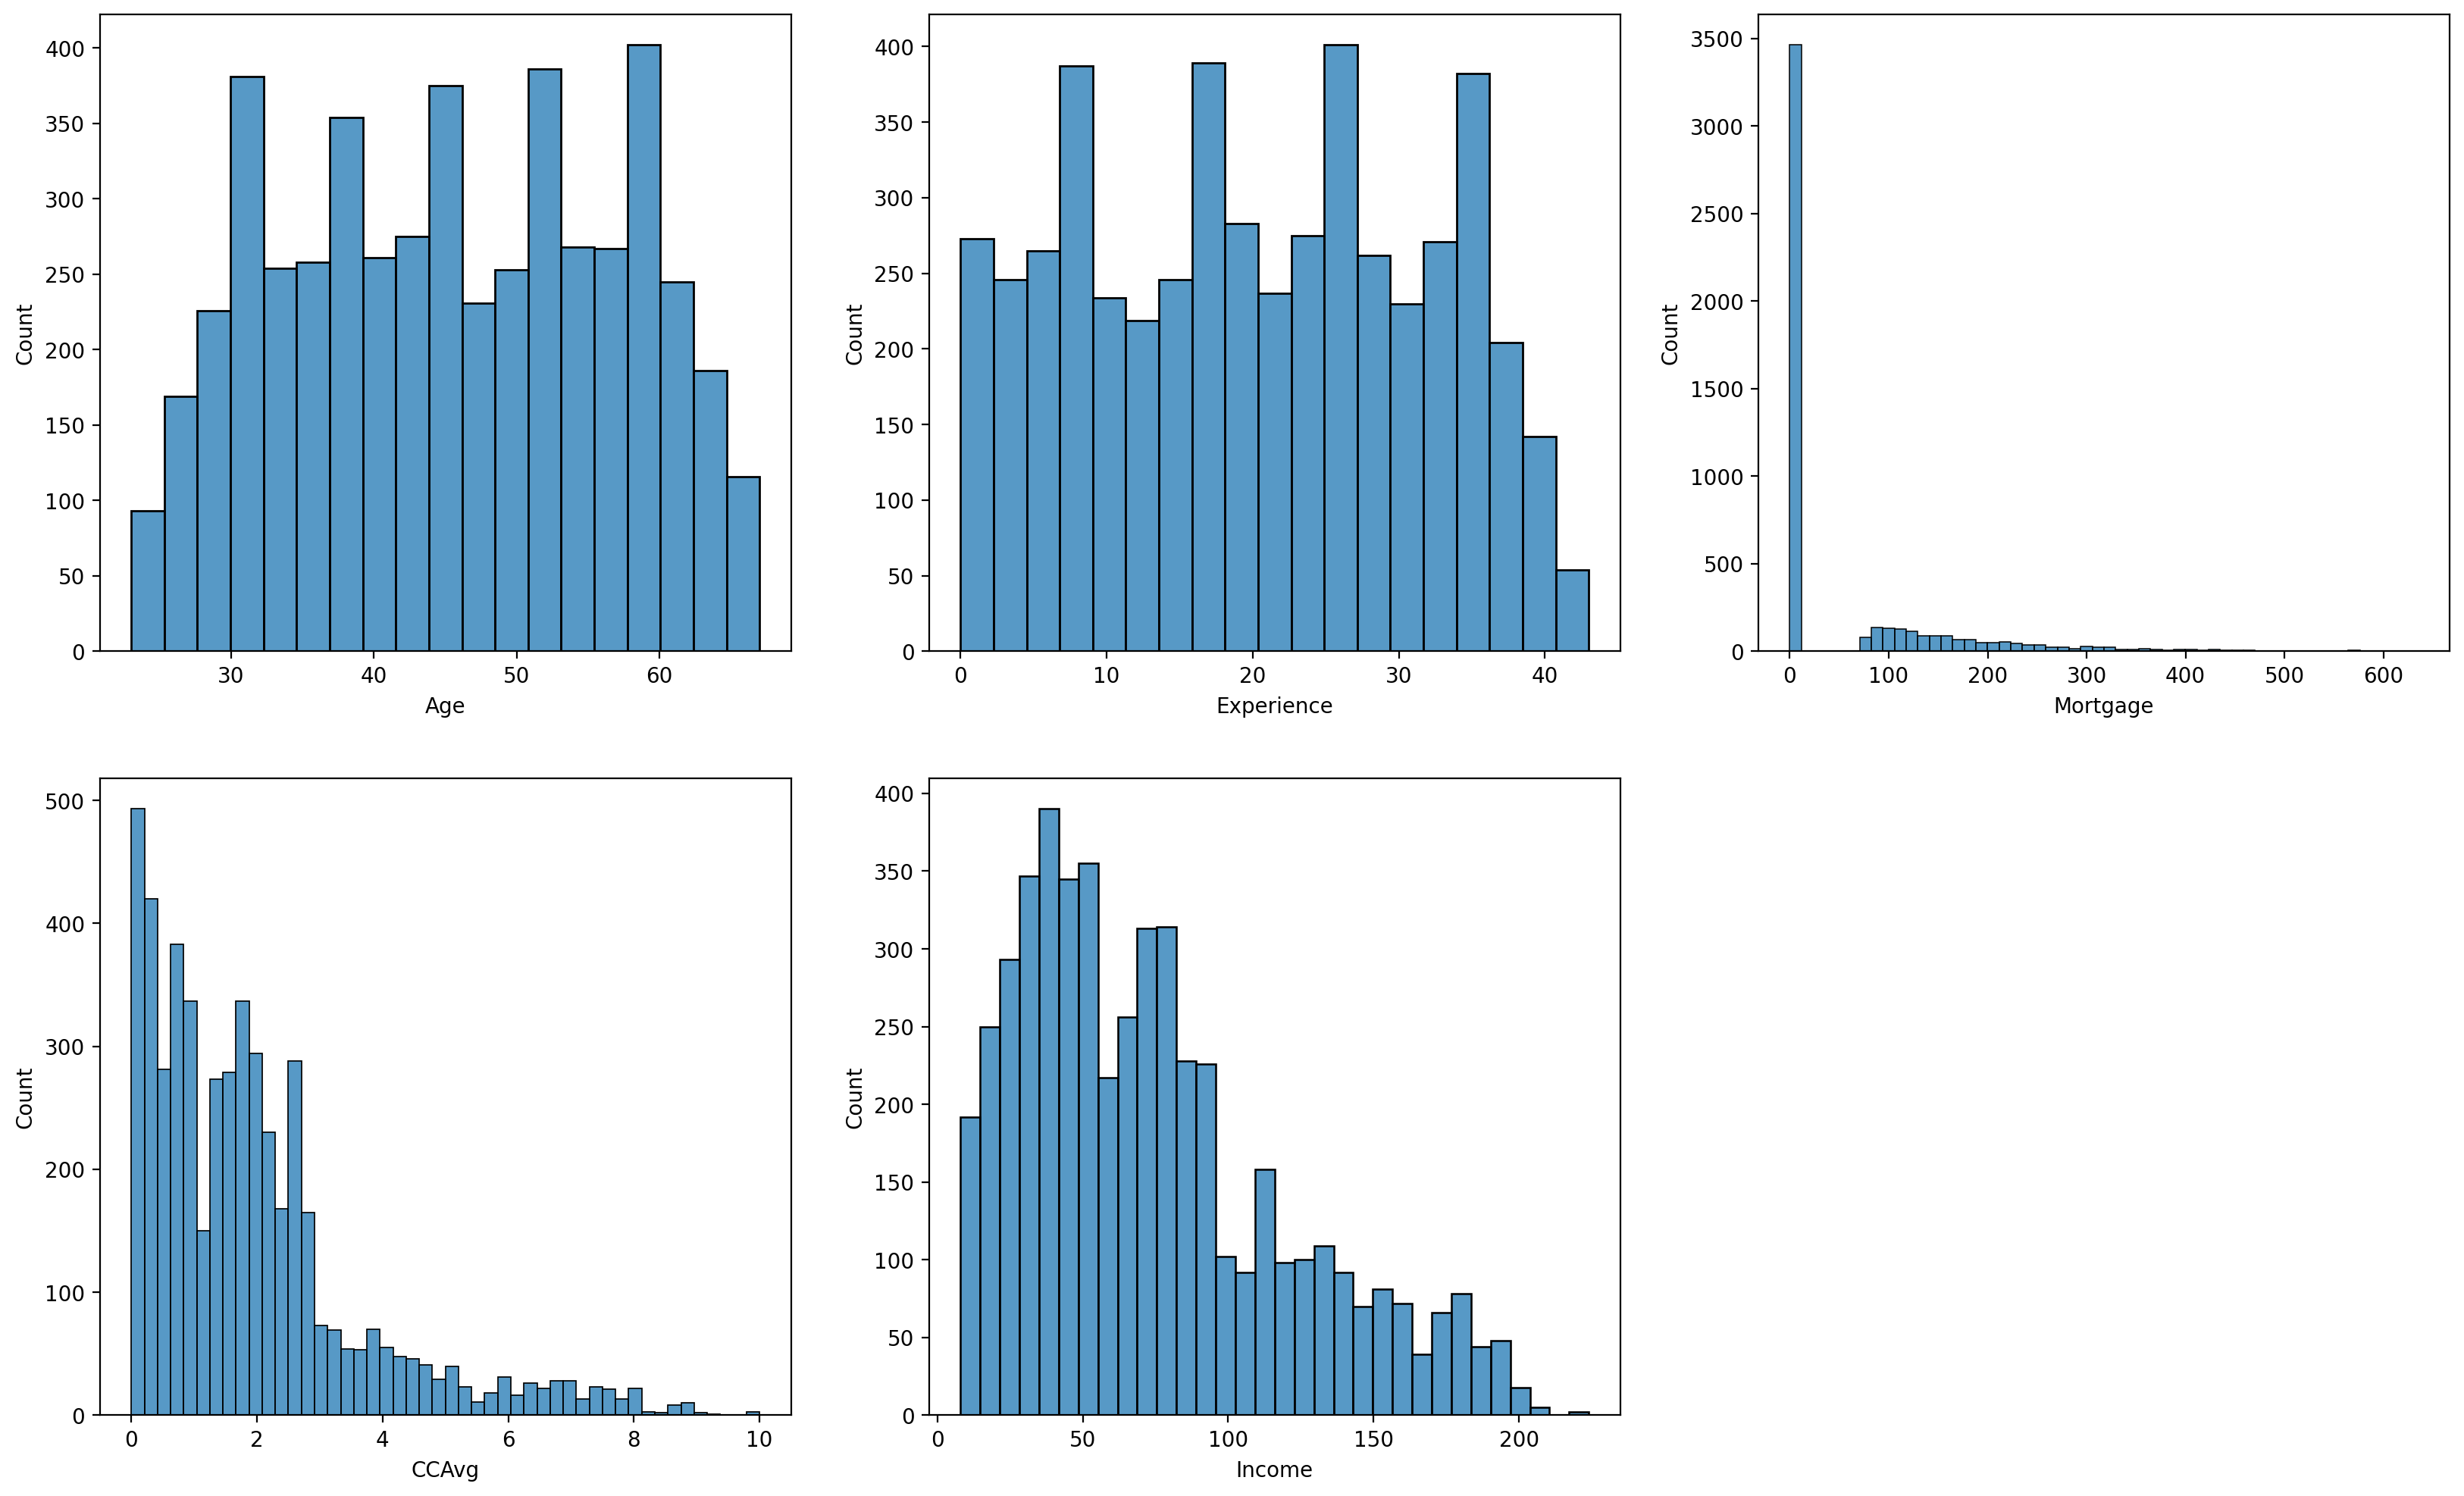

In [21]:
plt.figure(figsize=(20,12),dpi=200)

plt.subplot(2,3,1)
sns.histplot(data=df,x='Age')

plt.subplot(2,3,2)
sns.histplot(data=df,x='Experience')

plt.subplot(2,3,3)
sns.histplot(data=df,x='Mortgage')

plt.subplot(2,3,4)
sns.histplot(data=df,x='CCAvg')

plt.subplot(2,3,5)
sns.histplot(data=df,x='Income')



Checking for Skewness

In [22]:
df_cont = df[['Age','Experience','Mortgage','CCAvg','Income']]
df_cont.skew()

Age          -0.029341
Experience   -0.010038
Mortgage      2.104002
CCAvg         1.598443
Income        0.841339
dtype: float64

We notice that the features Mortgage, CCAvg, and Income have some skewness. We use Box PLots to summarize the data of these features and see how they are distributed and whether they contain any outliers or not.

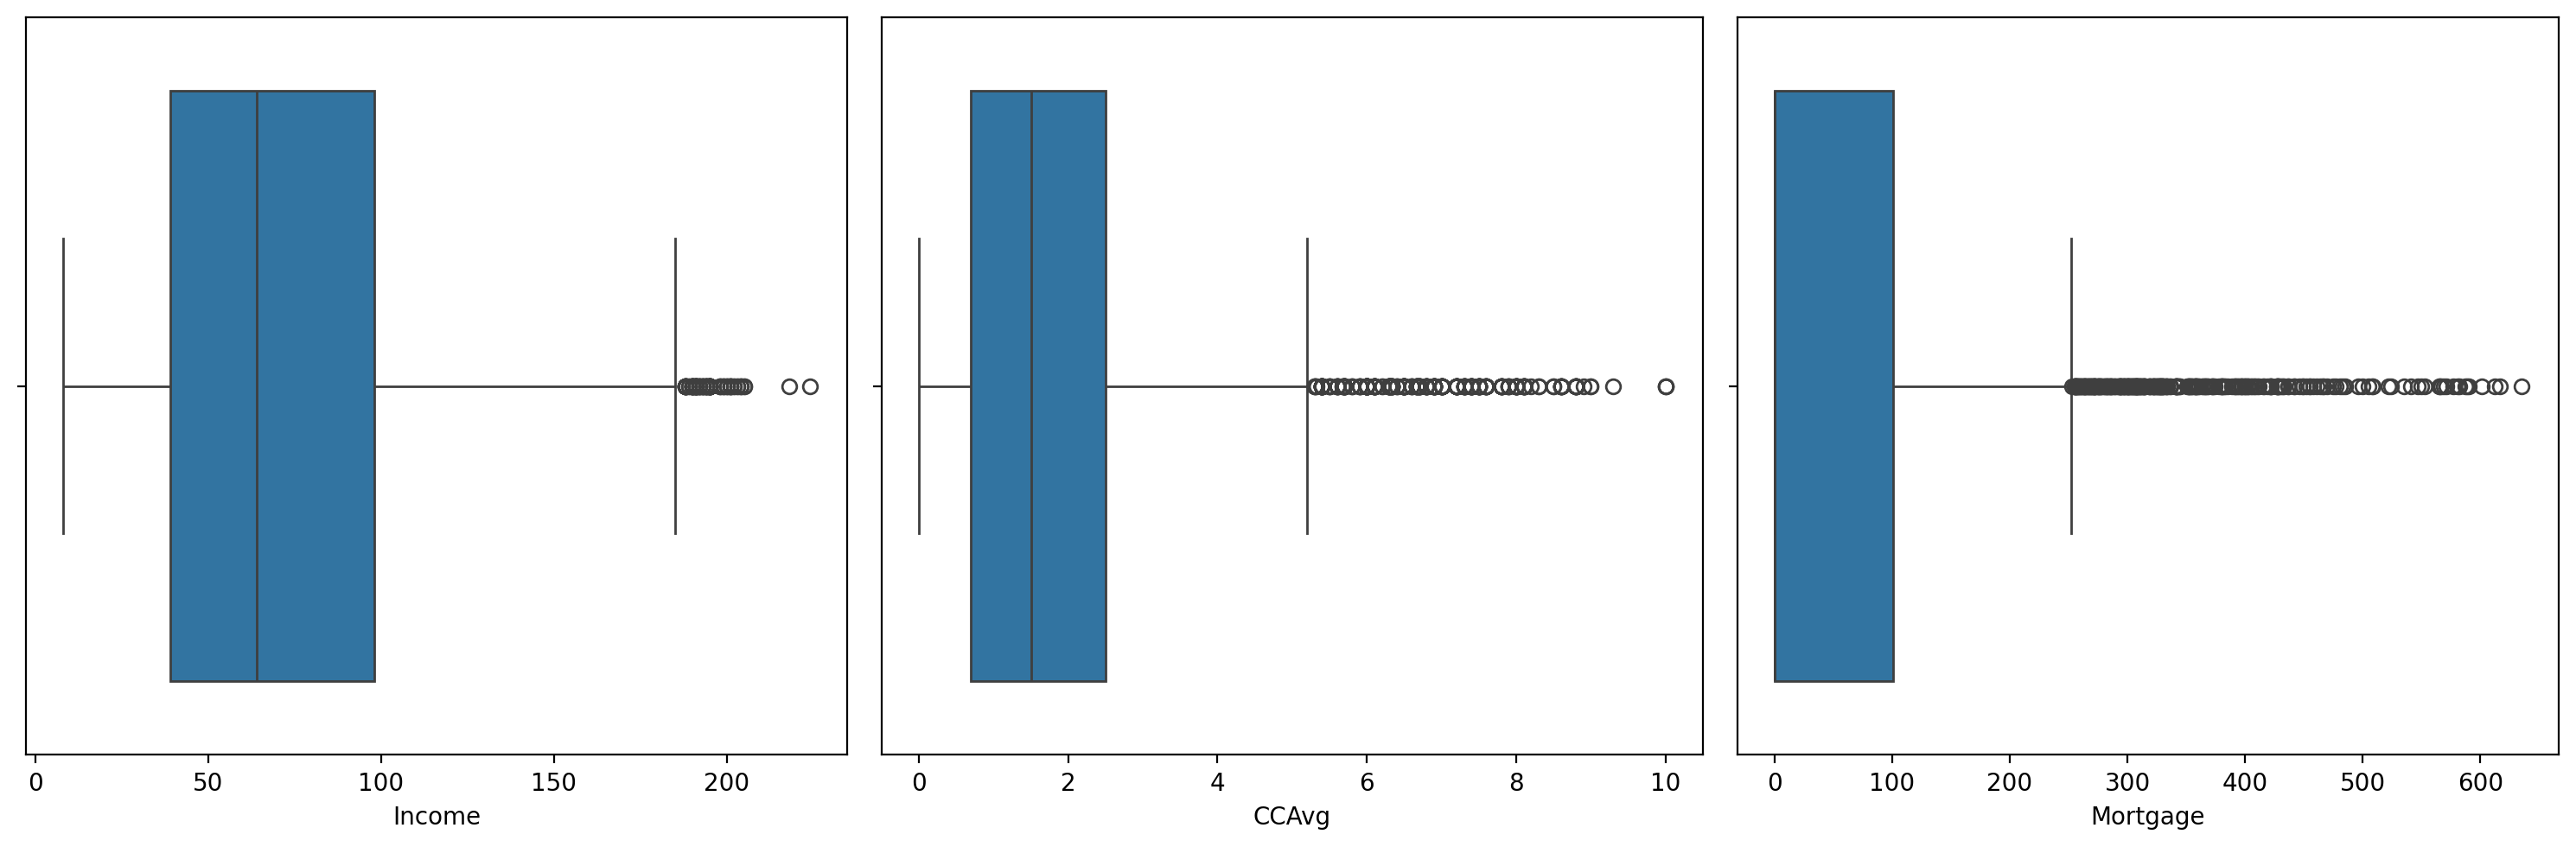

In [23]:
plt.figure(figsize = (15,5),dpi = 200)

plt.subplot(1,3,1)
sns.boxplot(x = 'Income', data = df)

plt.subplot(1,3,2)
sns.boxplot(x ='CCAvg', data = df)

plt.subplot(1,3,3)
sns.boxplot(x ='Mortgage', data = df)

plt.tight_layout()

We can see that these three features have outliers. In order to deal with these outliers we use the sqaure root transformation since the distribution of these three columns are positively skewed.

In [24]:
df['Income'] = np.sqrt(df['Income'])
df['CCAvg'] = np.sqrt(df['CCAvg'])
df['Mortgage'] = np.sqrt(df['Mortgage'])

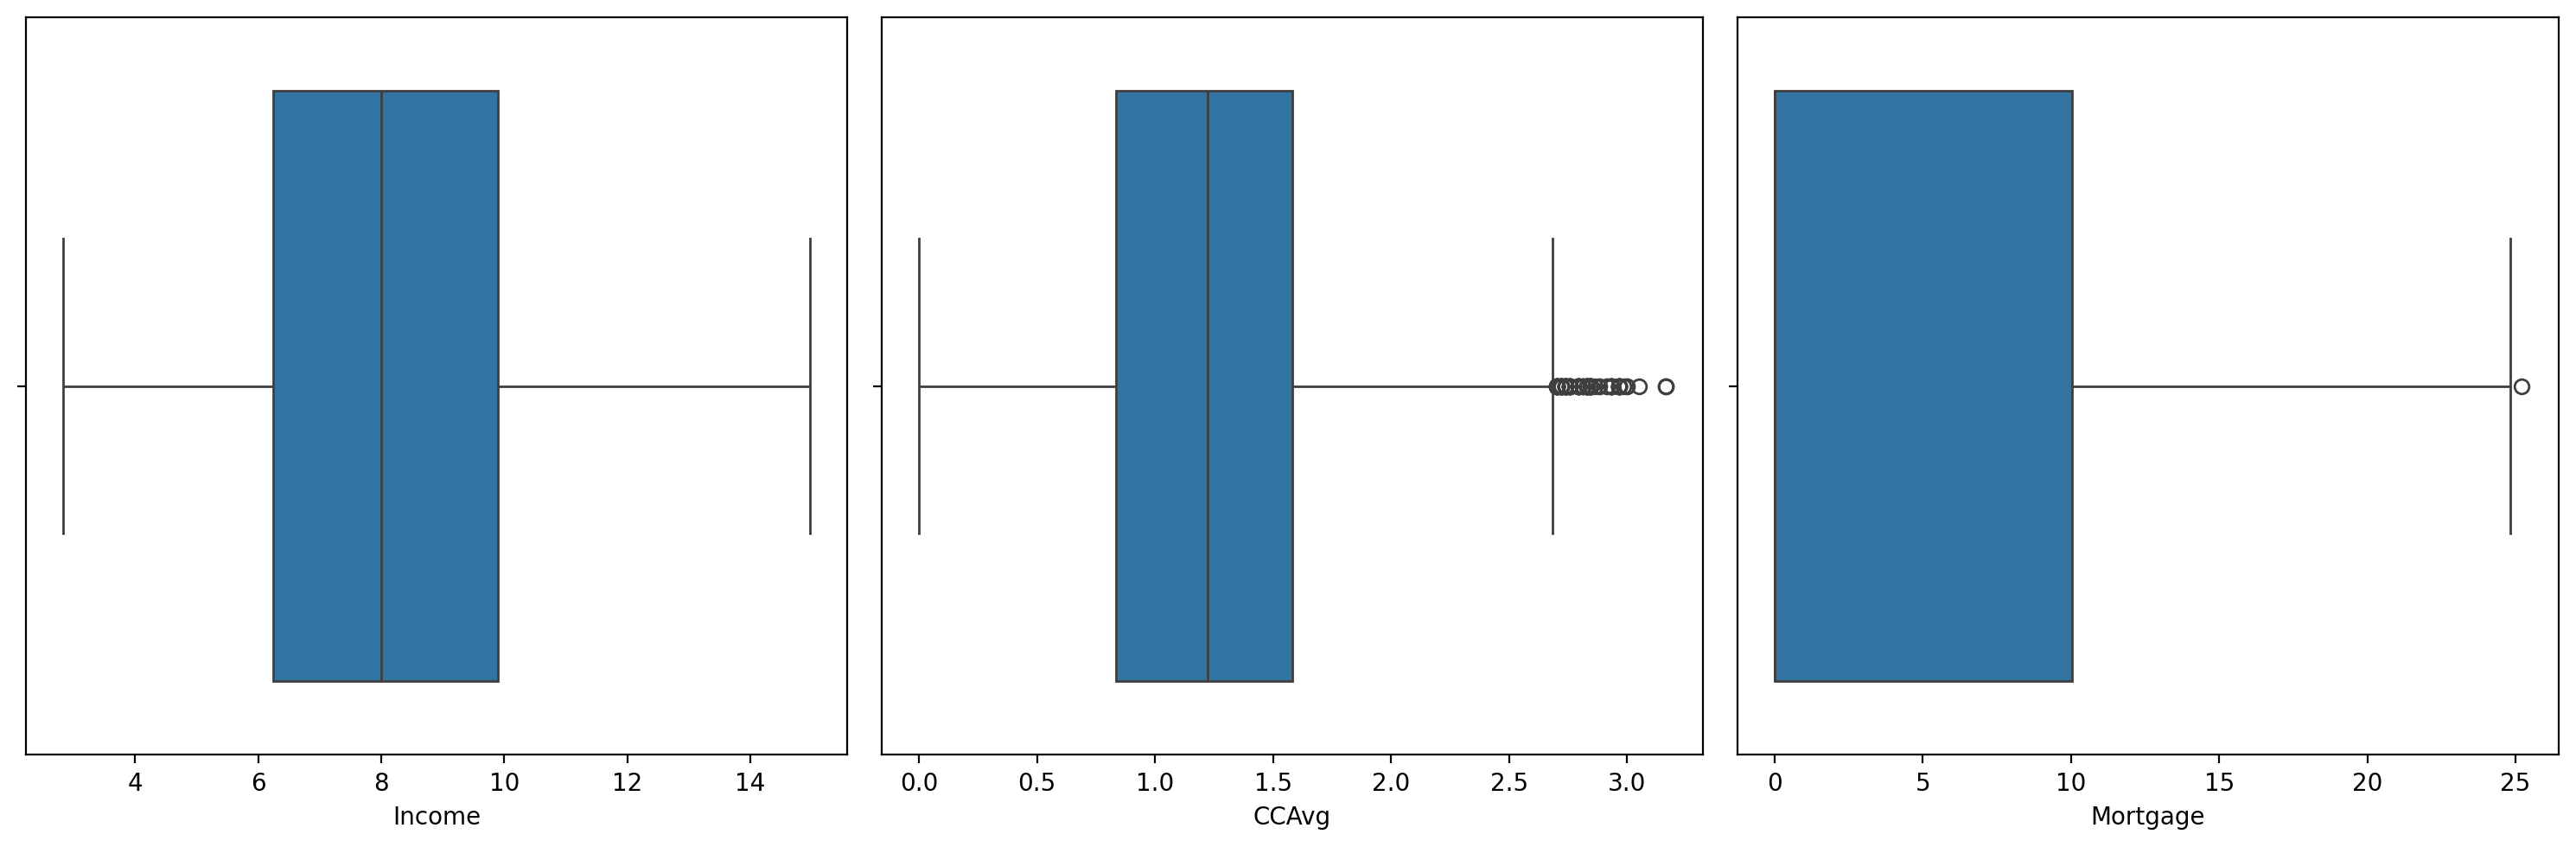

In [25]:
plt.figure(figsize = (15,5),dpi = 200)

plt.subplot(1,3,1)
sns.boxplot(x = 'Income', data = df)

plt.subplot(1,3,2)
sns.boxplot(x ='CCAvg', data = df)

plt.subplot(1,3,3)
sns.boxplot(x ='Mortgage', data = df)

plt.tight_layout()

Income and Mortgage has no significant outliers, but CCAvg has some. SO, now we try to control them.

In [26]:
Q1 = df['CCAvg'].quantile(0.25)
Q3 = df['CCAvg'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [27]:
df.loc[df['CCAvg'] <= LL]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard


The above result shows that there are no outliers that lie beyond the lower limit. Also from the box plot of CCAvg we can notice that all the outliers lie beyond the upper limit. So, we replace the latter ones with the upper limit.

In [28]:
#replacing the outliers with the upper limit
df.loc[df['CCAvg'] >= UL,'CCAvg'] = UL

<Axes: xlabel='CCAvg'>

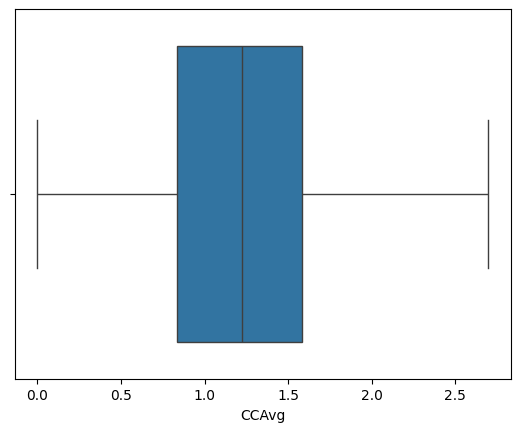

In [29]:
#rechecking whether our process worked correctly or not.
sns.boxplot(x ='CCAvg', data = df)

We see that there are no outliers left so we use this transformed data to carry out the rest of the analysis.

Checking the Correlation between various features using a heatmap.

<Axes: >

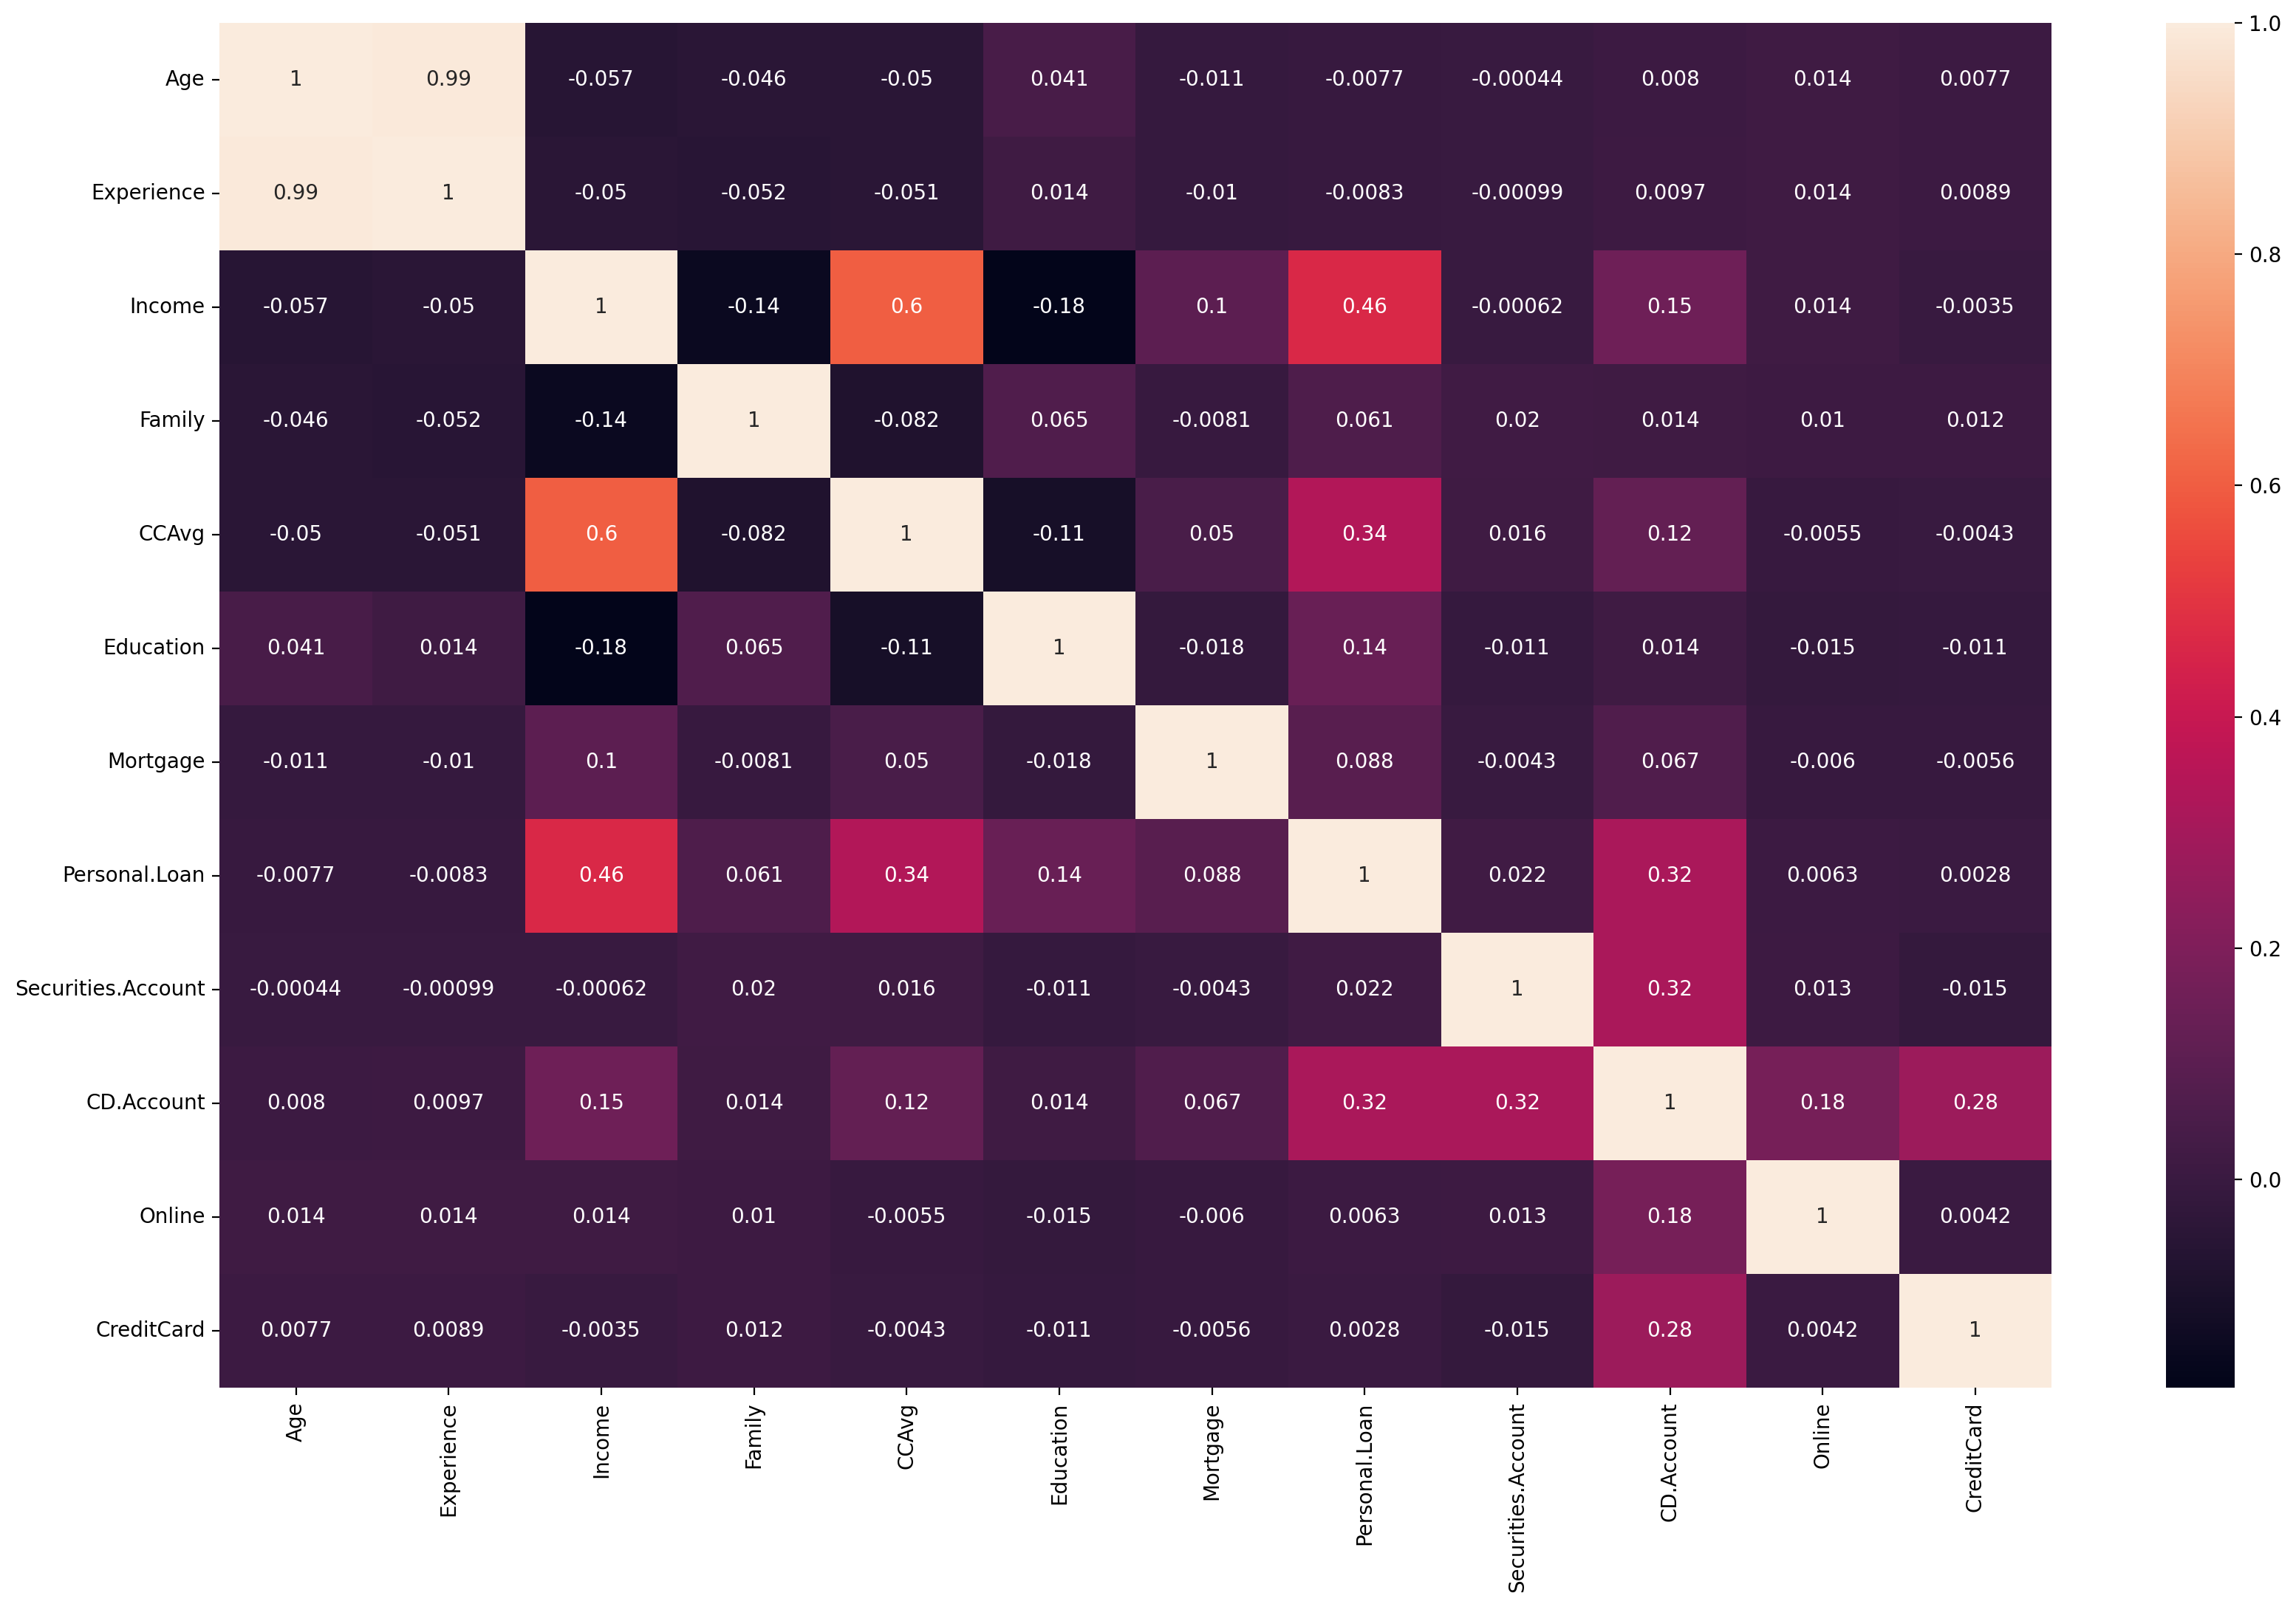

In [30]:
plt.figure(figsize=(20,12),dpi=200)
sns.heatmap(df.corr(),annot=True)

### Interpretation of heatmap

- Age is highly correlated with Experience. As age of a customer increases, there is a rapid increase in his experience. 
- There is some correlation (0.6) between Income and Credit Card Average Score. The increase in Income will affect the Credit Card Average Score positively and vice versa.
- The correlation between Income and whether a customer gets personal loan is 0.46.
- Rest of the features have little to neglible correlation with the other features.
- Each feature is perfectly correlated with itself.

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
y = df['Personal.Loan']
x = df.drop(['Personal.Loan'],axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

Earlier we noticed that the data is imbalanced, so we use SMOTETomek method to balance the data.

In [34]:
from collections import Counter
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
smt = SMOTETomek()
x_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 4063, 1: 437})
After Counter({0: 4062, 1: 4062})


In [35]:
scaler = StandardScaler()

In [36]:
X_train_scaled = scaler.fit_transform(x_train_sm)
X_test_scaled = scaler.transform(X_test)

## Modelling

### Fitting a Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train_sm)

LogisticRegression()

### Fitting K-nearest neighbors algorithm

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier(algorithm='auto')
k_values = list(range(1,20))
param_grid = {'n_neighbors':k_values}
knn_classifier = GridSearchCV(knn_model,param_grid,scoring='accuracy',cv=5)


In [39]:
knn_classifier.fit(X_train_scaled,y_train_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [40]:
knn_classifier.best_params_

{'n_neighbors': 1}

### Fitting a Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeClassifier()
param_dt = {'max_depth':list(range(1,10)),'min_samples_split':list(range(2,10))}
gs_dt_model = GridSearchCV(dt_model,param_dt,cv=5,scoring='accuracy')
gs_dt_model.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [42]:
gs_dt_model.best_params_

{'max_depth': 9, 'min_samples_split': 2}

### Fitting a Random Forest

In [43]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features = ['log2','sqrt',None]
max_depth = [2,4,7]
min_samples_split = [2,3,4]
min_samples_leaf = [2,4]
bootstrap = [True,False]

In [44]:
param_rfc = {'n_estimators': n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [46]:
gs_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = param_rfc,cv=3,verbose=2,n_jobs=4,error_score='raise')

In [47]:
gs_rfc_model.fit(x_train_sm,y_train_sm)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 7],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [48]:
gs_rfc_model.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 33}

## Model Evaluation and Comparison

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score,recall_score,accuracy_score

In [50]:
def metric(model,X):
    pred = model.predict(X)
    return([accuracy_score(y_test,pred),precision_score(y_test,pred),recall_score(y_test,pred),f1_score(y_test,pred)])

In [51]:
data = []
models = [log_model,knn_classifier,gs_dt_model,gs_rfc_model]
mod_name = ['Logistic Regression','K-Nearest Neighbor Classifier','Decision Tree Classifier','Random Forest Classifier']
for m in models:
    if (m==log_model) or (m==knn_classifier):
        data.append(metric(m,X_test_scaled))
    else:
        data.append(metric(m,X_test))

In [52]:
Comparison = pd.DataFrame(data, columns=['Accuracy','Precision','Recall','F1 Score'],index=mod_name)
Comparison

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.874,0.395833,0.883721,0.546763
K-Nearest Neighbor Classifier,0.954,0.708333,0.790698,0.747253
Decision Tree Classifier,0.982,0.854167,0.953488,0.901099
Random Forest Classifier,0.982,0.840000,0.976744,0.903226


### Interpretation
1. For Logistic Regression Model-
   - Here the model accuracy is 0.874, i.e., over all predictions, 87.4% of them are correct. 
   - Out of all the loans that was predicted to be approved by the model, only approximately 40% were actually approved. 
   - Out of all the loans that have been actually approved, the model could predict only 88.37% of them.
   - The F1 Score is 0.546763. 
2. For K-Nearest Neighbor Classifier-
   - Here the model accuracy is 0.954, i.e., over all predictions, 95.4% of them are correct. 
   - Out of all the loans that was predicted to be approved by the model, only approximately 71% were actually approved. 
   - Out of all the loans that have been actually approved, the model could predict only 79% of them.
   - The F1 Score is 0.747253. 
3.  For K-Nearest NeighborDecision Tree Classifier-
      - Here the model accuracy is 0.982	, i.e., over all predictions, 98.2% of them are correct. 
      - Out of all the loans that was predicted to be approved by the model, only approximately 85% were actually approved. 
      - Out of all the loans that have been actually approved, the model could predict only 95.37% of them.
      - The F1 Score is 0.982. 
4.  ForRandom Forest Classifier-
      - Here the model accuracy is 0.980, i.e., over all predictions, 98.0% of them are correct. 
      - Out of all the loans that was predicted to be approved by the model, only approximately 82.35% were actually approved. 
      - Out of all the loans that have been actually approved, the model could predict only 97.67% of them.
      - The F1 Score is 0.893617.

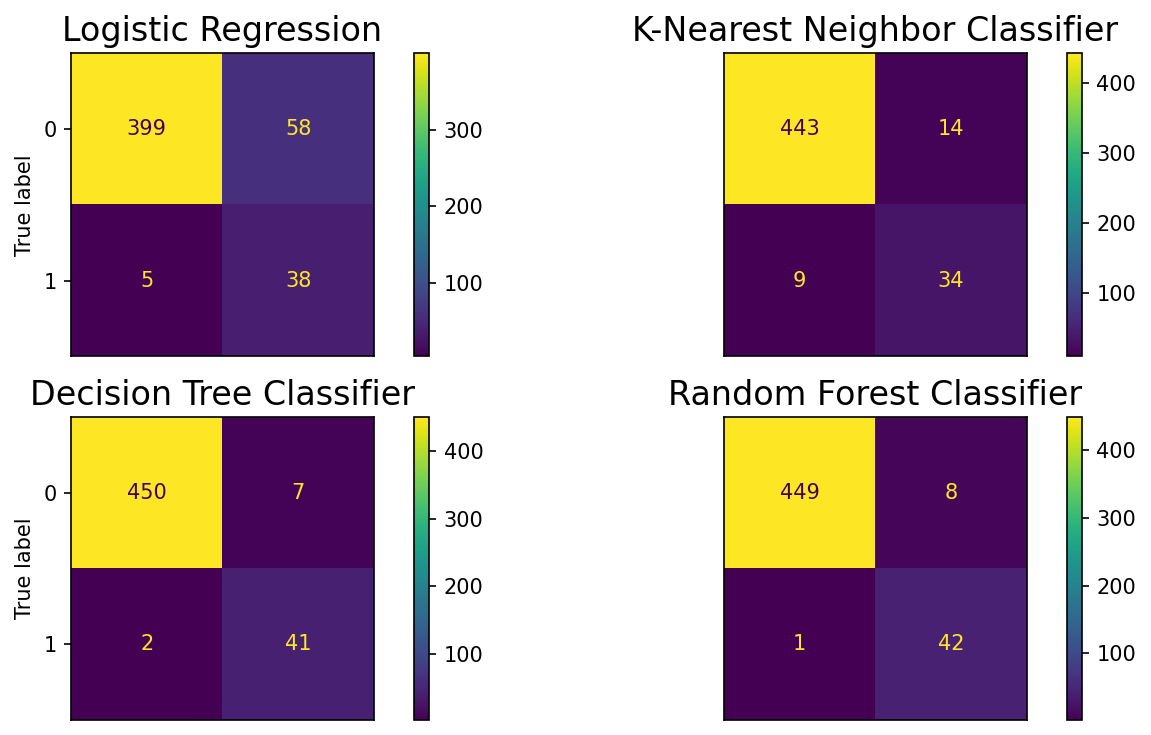

In [53]:
f, axes = plt.subplots(2, 2, figsize=(10,5),dpi=150)

axes[0, 0].set_title("Logistic Regression", size=16)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,log_model.predict(X_test_scaled)),display_labels=log_model.classes_).plot(ax=axes[0,0])
axes[0, 0].xaxis.set_ticklabels(['', ''])
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

axes[0, 1].set_title("K-Nearest Neighbor Classifier", size=16)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,knn_classifier.predict(X_test_scaled)),display_labels=knn_classifier.classes_).plot(ax=axes[0,1])
axes[0, 1].xaxis.set_ticklabels(['', ''])
axes[0, 1].yaxis.set_ticklabels(['', ''])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='both', which='both', bottom=False, left=False)

axes[1, 0].set_title("Decision Tree Classifier", size=16)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,gs_dt_model.predict(X_test)),display_labels=gs_dt_model.classes_).plot(ax=axes[1,0])
axes[1, 0].xaxis.set_ticklabels(['', ''])
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', which='both', bottom=False)

axes[1, 1].set_title("Random Forest Classifier", size=16)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,gs_rfc_model.predict(X_test)),display_labels=gs_rfc_model.classes_).plot(ax=axes[1,1])
axes[1, 1].xaxis.set_ticklabels(['', ''])
axes[1, 1].yaxis.set_ticklabels(['', ''])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='both', which='both', bottom=False, left=False)

plt.tight_layout();

### AUC-ROC CURVE



In [54]:
from sklearn.metrics import roc_auc_score,roc_curve

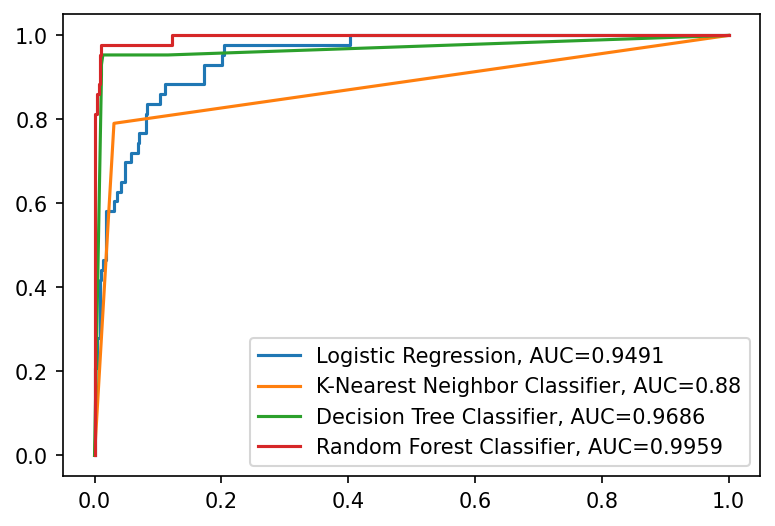

In [58]:
plt.figure(figsize=(6,4),dpi=150)

lgm_pred_prob = log_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, lgm_pred_prob)
auc = round(roc_auc_score(y_test, lgm_pred_prob), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

knn_pred_prob = knn_classifier.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)
auc = round(roc_auc_score(y_test, knn_pred_prob), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbor Classifier, AUC="+str(auc))

dt_pred_prob = gs_dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
auc = round(roc_auc_score(y_test, dt_pred_prob), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

rfc_pred_prob = gs_rfc_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, rfc_pred_prob)
auc = round(roc_auc_score(y_test, rfc_pred_prob), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

plt.legend();

### Interpretation
- The ROC-AUC Score for Logistic Regression model is 0.9491 , which means that approximately 95% of the time the model can distinguish between the two classes. 
- The ROC-AUC Score for K-Nearest Neighbor Classifier is 0.88 , which means that approximately 88% of the time the model can distinguish between the two classes. 
- The ROC-AUC Score for Decision Tree Classifier is 0.9686 , which means that approximately 96.86% of the time the model can distinguish between the two classes. 
- The ROC-AUC Score for Random Forest Classifier is 0.9959 , which means that approximately 99.59% of the time the model can distinguish between the two classes.  

### Precision vs Recall curve

In [56]:
from sklearn.metrics import PrecisionRecallDisplay,average_precision_score,precision_recall_curve

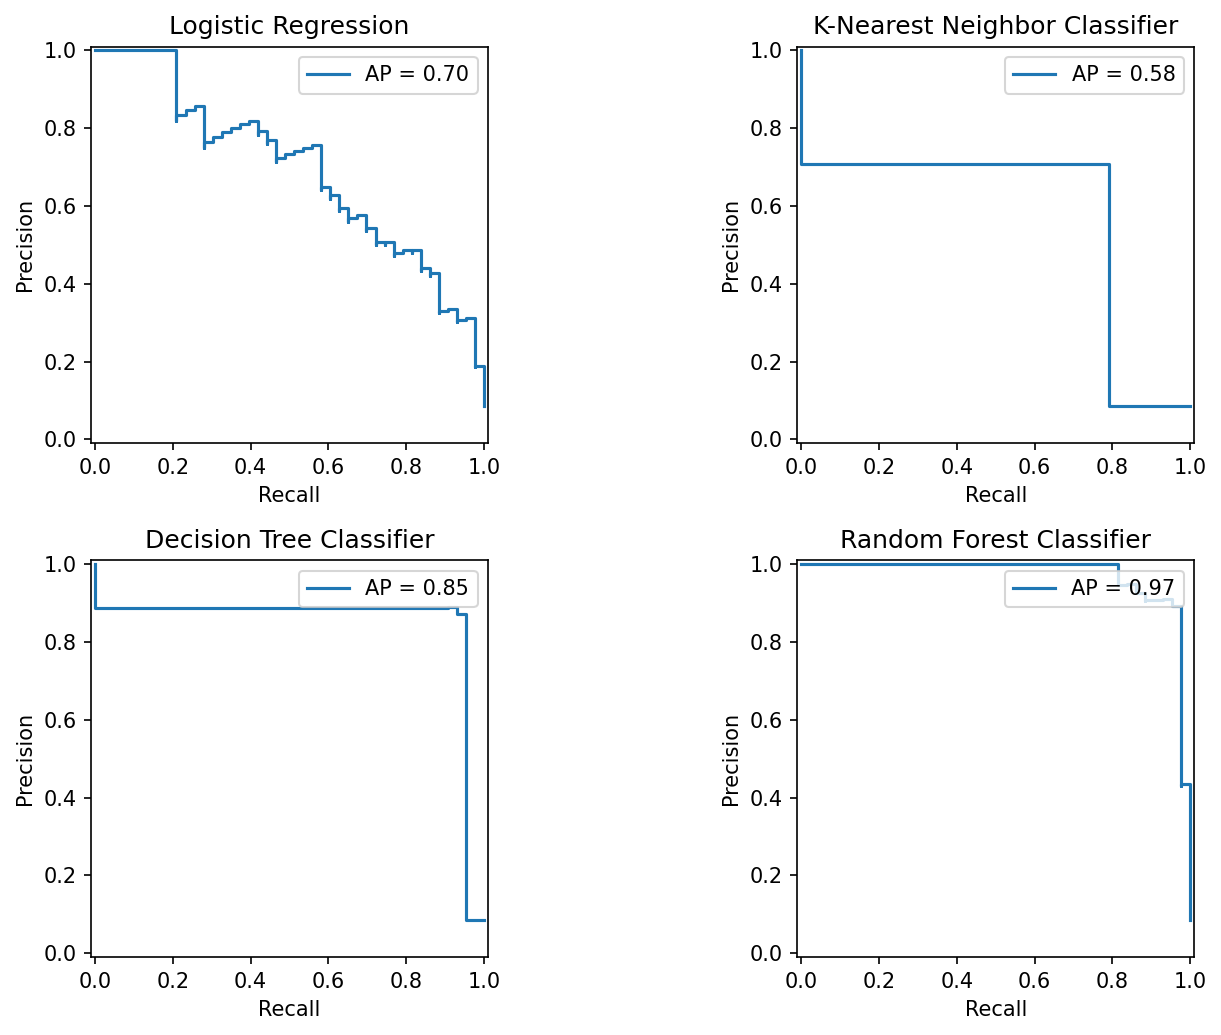

In [59]:
f, axes = plt.subplots(2, 2, figsize=(10,7),dpi=150)

axes[0, 0].set_title("Logistic Regression", size=12)
precision, recall, _ = precision_recall_curve(y_test, lgm_pred_prob)
ap = average_precision_score(y_test, lgm_pred_prob)
PrecisionRecallDisplay(precision, recall, average_precision=ap).plot(ax=axes[0,0])
axes[0,0].legend(loc='upper right')

axes[0, 1].set_title("K-Nearest Neighbor Classifier", size=12)
precision, recall, _ = precision_recall_curve(y_test, knn_pred_prob)
ap = average_precision_score(y_test, knn_pred_prob)
PrecisionRecallDisplay(precision, recall, average_precision=ap).plot(ax=axes[0,1])
axes[0,1].legend(loc='upper right')

axes[1, 0].set_title("Decision Tree Classifier", size=12)
precision, recall, _ = precision_recall_curve(y_test, dt_pred_prob)
ap = average_precision_score(y_test, dt_pred_prob)
PrecisionRecallDisplay(precision, recall, average_precision=ap).plot(ax=axes[1,0])
axes[1,0].legend(loc='upper right')

axes[1, 1].set_title("Random Forest Classifier", size=12)
precision, recall, _ = precision_recall_curve(y_test, rfc_pred_prob)
ap = average_precision_score(y_test, rfc_pred_prob)
PrecisionRecallDisplay(precision, recall, average_precision=ap).plot(ax=axes[1,1])
axes[1,1].legend(loc='upper right')

plt.tight_layout();

The Precision vs Recall Curve for the Random Forest Classifier has a AUC score of 0.97, which is the highest amongst that of all the other models. Also, the model corresponds to a high precision and a high recall value, hence the model is supposedly good. However the rest of the models have comparatively lesser AUC score, with KNN Classifier having the least value. 

# CONCLUSION

After comparing the four models using metrics such as accuracy, precision, recall, f1 score, roc-auc curve and precision-recall curve we can finally conclude that Random Forest is the best amongst the four models with 
- Accuracy of 98%.
- Precision of 82.35%,
- Recall of 97.67%
- F1 Score of 0.893617,
- ROC-AUC Score of 0.9959 and,
- Precision-Recall curve having a AUC score of 0.97.